In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset
import seaborn as sns

/tmp/ipykernel_4922/4090892198.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [3]:
iris=sns.load_dataset('iris')
iris
data=iris.drop(columns=['species']).values
data=torch.tensor(data).float()
iris.species.unique()
labels=torch.zeros(len(data),dtype=torch.long)
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2


In [4]:
data

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [5]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [7]:
def createANNmodel(L2lambda):
    ANNiris=nn.Sequential(nn.Linear(4,64),
                         nn.ReLU(),
                         nn.Linear(64,64),
                         nn.ReLU(),

                         nn.Linear(64,3),   
                         )
    lossfun=nn.CrossEntropyLoss()
    optimizer=torch.optim.SGD(ANNiris.parameters(),lr=0.005,weight_decay=L2lambda)
    return ANNiris,lossfun,optimizer

In [8]:
numepoches=1000
def trainTheModel(ANNiris,lossfun,optimizer):
    trainAcc=[]
    testAcc=[]
    losses=[]
    
    for epochi in range(numepoches):
    
        batchAcc=[]
        batchLoss=[]
        for X,y in train_loader:
            yHat=ANNiris(X)
            loss=lossfun(yHat,y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item())
            batchLoss.append(loss.item())
        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))
        
        ANNiris.eval()
        X,y=next(iter(test_loader))
        predlabels=torch.argmax(ANNiris(X),axis=1)
        testAcc.append(100*torch.mean((predlabels==y).float()).item())
        ANNiris.train()
    return trainAcc,testAcc,losses    

In [10]:
L2lambda=0.01
ANNiris,lossfun,optimizer=createANNmodel(L2lambda)
trainAcc,testAcc,losses=trainTheModel(ANNiris,lossfun,optimizer)    

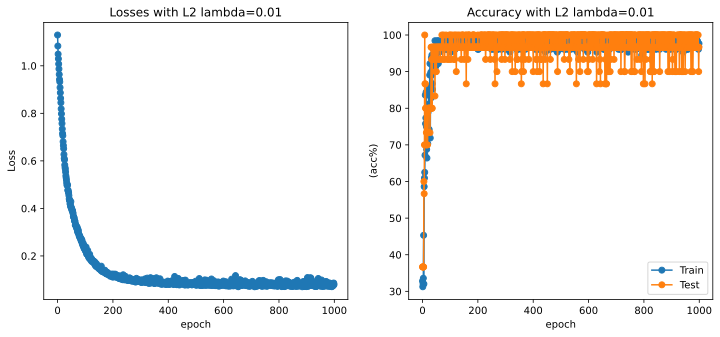

In [12]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(losses,'o-')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title(f"Losses with L2 lambda={L2lambda}")

ax[1].plot(trainAcc,'o-')
ax[1].plot(testAcc,'o-')
ax[1].set_title(f"Accuracy with L2 lambda={L2lambda}")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('(acc%)')
ax[1].legend(['Train','Test'])
plt.show()


In [13]:
 def smooth(x,k=5):
    return np.convolve(x,np.ones(k)/k,mode='same')

In [20]:
l2lambdas=np.linspace(0,0.1,5)
accTrain=np.zeros((numepoches,len(l2lambdas)))
accTest=np.zeros((numepoches,len(l2lambdas)))
for li in range(len(l2lambdas)):
    ANNiris,lossfun,optimizer=createANNmodel(l2lambdas[li])
    trainAcc,testAcc,losses=trainTheModel(ANNiris,lossfun,optimizer)    
    accTrain[:,li]=smooth(trainAcc,10)
    accTest[:,li]=smooth(testAcc,10)
    

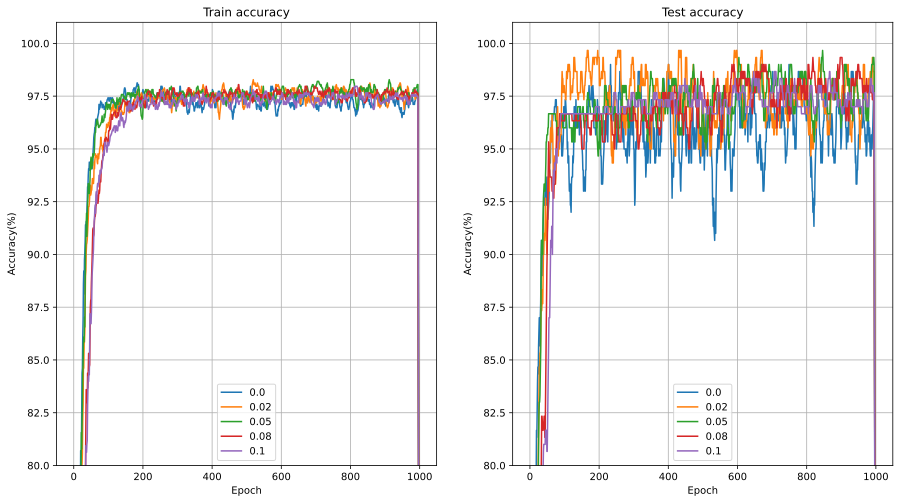

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
ax[0].plot(accTrain)
ax[0].set_title('Train accuracy')
ax[1].plot(accTest)
ax[1].set_title('Test accuracy')
leglabels=[np.round(i,2) for i in l2lambdas]
for i in range(2):
    ax[i].legend(leglabels)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('Accuracy(%)')
    ax[i].set_ylim([80,101])
    ax[i].grid()

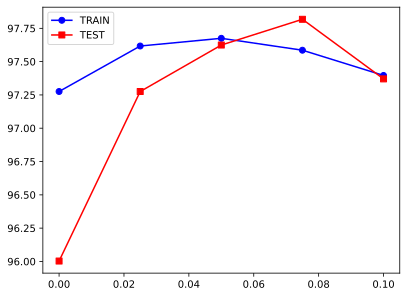

In [23]:
epoch_range=[500,950]
plt.plot(l2lambdas,
        np.mean(accTrain[epoch_range[0]:epoch_range[1],:],axis=0),'bo-',label='TRAIN')
plt.plot(l2lambdas,
        np.mean(accTest[epoch_range[0]:epoch_range[1],:],axis=0),'rs-',label='TEST')
plt.legend()